In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install pefile==2017.9.3

  Using cached pefile-2017.9.3-py3-none-any.whl
  Attempting uninstall: pefile
    Found existing installation: pefile 2019.4.18
    Uninstalling pefile-2019.4.18:
      Successfully uninstalled pefile-2019.4.18
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install pefile==2019.4.18


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached pefile-2019.4.18-py3-none-any.whl
  Attempting uninstall: pefile
    Found existing installation: pefile 2017.9.3
    Uninstalling pefile-2017.9.3:
      Successfully uninstalled pefile-2017.9.3


In [5]:
pip install -U scikit-learn scipy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
pip install tensorflow


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Library
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy
import pickle
import pefile
import sklearn.ensemble as ek
from sklearn.feature_selection import SelectFromModel
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
import sklearn.metrics as metrics
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
import time
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [8]:
# Input Dataset 

DM = pd.read_csv("C:\\Users\\Muhammad Raihan\\Downloads\\Obfuscated-MalMem2022.csv") #DM--> Dataset Malware

In [9]:
# Menapilkan head (5 Data Teratas)

DM.head()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,Benign,45,17,10.555556,0,202.844444,1694,38.500000,9129,212.302326,...,221,26,24,116,0,121,87,0,8,Benign
1,Benign,47,19,11.531915,0,242.234043,2074,44.127660,11385,242.234043,...,222,26,24,118,0,122,87,0,8,Benign
2,Benign,40,14,14.725000,0,288.225000,1932,48.300000,11529,288.225000,...,222,26,27,118,0,120,88,0,8,Benign
3,Benign,32,13,13.500000,0,264.281250,1445,45.156250,8457,264.281250,...,222,26,27,118,0,120,88,0,8,Benign
4,Benign,42,16,11.452381,0,281.333333,2067,49.214286,11816,281.333333,...,222,26,24,118,0,124,87,0,8,Benign


In [10]:
# Menampilkan Tail (5 Data Terbawah)

DM.tail()

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
58591,Ransomware-Shade-fa03be3078d1b9840f06745f160eb...,37,15,10.108108,0,215.486487,1453,39.270270,7973,215.486487,...,221,26,24,116,0,120,86,0,8,Malware
58592,Ransomware-Shade-f56687137caf9a67678cde91e4614...,37,14,9.945946,0,190.216216,1347,36.405405,7038,190.216216,...,221,26,24,116,0,116,88,0,8,Malware
58593,Ransomware-Shade-faddeea111a25da4d0888f3044ae9...,38,15,9.842105,0,210.026316,1448,38.105263,7982,215.729730,...,221,26,24,116,0,120,88,0,8,Malware
58594,Ransomware-Shade-f866c086af2e1d8ebaa6f2c863157...,37,15,10.243243,0,215.513513,1452,39.243243,7974,215.513513,...,221,26,24,116,0,120,87,0,8,Malware
58595,Ransomware-Shade-955d9af38346c1755527bd196668e...,38,15,9.868421,0,213.026316,1487,39.131579,8095,213.026316,...,221,26,24,116,0,120,86,0,8,Malware


In [11]:
# Menampilkan Kesimpulan Atribut Numerik

DM.describe(include="all")

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
count,58596,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000,58596
unique,28346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign
freq,29298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29298
mean,NaN,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,...,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881,NaN
std,NaN,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,...,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929,NaN
min,NaN,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,...,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000,NaN
25%,NaN,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,...,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000,NaN
50%,NaN,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,...,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000,NaN
75%,NaN,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,...,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000,NaN


In [12]:
# Menampilkan Kesimpulan Atribut Numerik

DM.describe(include="all")

,Category,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
count,58596,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,5.859600e+04,58596.000000,...,58596.000000,58596.000000,58596.000000,58596.000000,58596.0,58596.000000,58596.000000,58596.000000,58596.000000,58596
unique,28346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,Benign,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Benign
freq,29298,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29298
mean,NaN,41.394771,14.713837,11.341655,0.0,247.509819,1810.805447,43.707806,1.025858e+04,249.560958,...,221.406581,25.996245,25.063417,116.879514,0.0,121.995546,86.905659,0.000853,7.999881,NaN
std,NaN,5.777249,2.656748,1.588231,0.0,111.857790,329.782639,5.742023,4.866864e+03,145.999866,...,1.991087,0.170790,1.529628,1.550401,0.0,2.822858,3.134117,0.029199,0.010929,NaN
min,NaN,21.000000,8.000000,1.650000,0.0,34.962500,670.000000,7.333333,3.514000e+03,71.139241,...,55.000000,6.000000,7.000000,26.000000,0.0,30.000000,50.000000,0.000000,7.000000,NaN
25%,NaN,40.000000,12.000000,9.972973,0.0,208.725000,1556.000000,38.833333,8.393000e+03,209.648228,...,221.000000,26.000000,24.000000,116.000000,0.0,121.000000,87.000000,0.000000,8.000000,NaN
50%,NaN,41.000000,15.000000,11.000000,0.0,243.963710,1735.000000,42.781524,9.287500e+03,247.208951,...,221.000000,26.000000,24.000000,116.000000,0.0,122.000000,87.000000,0.000000,8.000000,NaN
75%,NaN,43.000000,16.000000,12.861955,0.0,289.974322,2087.000000,49.605280,1.219300e+04,291.355050,...,222.000000,26.000000,27.000000,118.000000,0.0,123.000000,88.000000,0.000000,8.000000,NaN


In [13]:
DM["Class"].value_counts()

Benign     29298
Malware    29298
Name: Class, dtype: int64

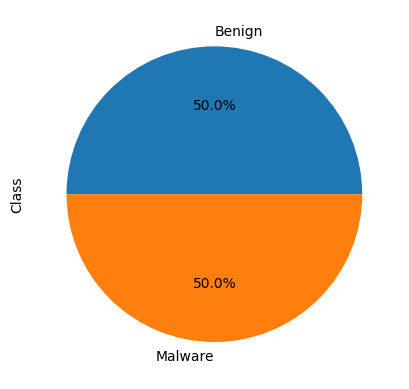

In [14]:
#Visualisasi

DM["Class"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

In [15]:
#Feature Selection
X = DM.drop(['Category','Class'],axis=1).values    #Droping this because classification model will not accept object type elements (float and int only)
# Target variable
y = DM['Class'].values

In [16]:
#Data Fitting and choosing the important variables
extratrees = ek.ExtraTreesClassifier().fit(X,y)
model = SelectFromModel(extratrees, prefit=True)
X_new = model.transform(X)
nbfeatures = X_new.shape[1]

In [17]:
#Number of important features
nbfeatures

16

In [18]:
features = []
index = numpy.argsort(extratrees.feature_importances_)[::-1][:nbfeatures]

In [19]:
#All the required features
for f in range(nbfeatures):
    print("%d. feature %s (%f)" % (f + 1, DM.columns[2+index[f]], extratrees.feature_importances_[index[f]]))
    features.append(DM.columns[2+f])

1. feature handles.nhandles (0.090545)
2. feature dlllist.avg_dlls_per_proc (0.080591)
3. feature svcscan.shared_process_services (0.067881)
4. feature ldrmodules.not_in_load (0.066051)
5. feature pslist.nprocs64bit (0.060138)
6. feature handles.ndesktop (0.059739)
7. feature handles.ndirectory (0.053026)
8. feature svcscan.kernel_drivers (0.051673)
9. feature handles.nthread (0.050867)
10. feature svcscan.interactive_process_services (0.048031)
11. feature handles.ntimer (0.042099)
12. feature ldrmodules.not_in_init (0.040477)
13. feature handles.nsection (0.038445)
14. feature callbacks.ncallbacks (0.033989)
15. feature ldrmodules.not_in_load_avg (0.031311)
16. feature svcscan.fs_drivers (0.024699)


In [20]:
class NeuralDecisionTree(keras.Model):
    def __init__(self, depth, num_features, used_features_rate, num_classes):
        super().__init__()
        self.depth = depth
        self.num_leaves = 2 ** depth
        self.num_classes = num_classes

        # Create a mask for the randomly selected features.
        num_used_features = int(num_features * used_features_rate)
        one_hot = np.eye(num_features)
        sampled_feature_indicies = np.random.choice(
            np.arange(num_features), num_used_features, replace=False
        )
        self.used_features_mask = one_hot[sampled_feature_indicies]

        # Initialize the weights of the classes in leaves.
        self.pi = tf.Variable(
            initial_value=tf.random_normal_initializer()(
                shape=[self.num_leaves, self.num_classes]
            ),
            dtype="float32",
            trainable=True,
        )

        # Initialize the stochastic routing layer.
        self.decision_fn = layers.Dense(
            units=self.num_leaves, activation="sigmoid", name="decision"
        )

    def call(self, features):
        batch_size = tf.shape(features)[0]

        # Apply the feature mask to the input features.
        features = tf.matmul(
            features, self.used_features_mask, transpose_b=True
        )  # [batch_size, num_used_features]
        # Compute the routing probabilities.
        decisions = tf.expand_dims(
            self.decision_fn(features), axis=2
        )  # [batch_size, num_leaves, 1]
        # Concatenate the routing probabilities with their complements.
        decisions = layers.concatenate(
            [decisions, 1 - decisions], axis=2
        )  # [batch_size, num_leaves, 2]

        mu = tf.ones([batch_size, 1, 1])

        begin_idx = 1
        end_idx = 2
        # Traverse the tree in breadth-first order.
        for level in range(self.depth):
            mu = tf.reshape(mu, [batch_size, -1, 1])  # [batch_size, 2 ** level, 1]
            mu = tf.tile(mu, (1, 1, 2))  # [batch_size, 2 ** level, 2]
            level_decisions = decisions[
                :, begin_idx:end_idx, :
            ]  # [batch_size, 2 ** level, 2]
            mu = mu * level_decisions  # [batch_size, 2**level, 2]
            begin_idx = end_idx
            end_idx = begin_idx + 2 ** (level + 1)

        mu = tf.reshape(mu, [batch_size, self.num_leaves])  # [batch_size, num_leaves]
        probabilities = keras.activations.softmax(self.pi)  # [num_leaves, num_classes]
        outputs = tf.matmul(mu, probabilities)  # [batch_size, num_classes]
        return outputs

In [21]:
class NeuralDecisionForest(keras.Model):
    def __init__(self, num_trees, depth, num_features, used_features_rate, num_classes):
        super().__init__()
        self.ensemble = []
        # Initialize the ensemble by adding NeuralDecisionForest instances.
        # Each tree will have its own randomly selected input features to use.
        for _ in range(num_trees):
            self.ensemble.append(
                NeuralDecisionTree(depth, num_features, used_features_rate, num_classes)
            )

    def call(self, inputs):
        # Initialize the outputs: a [batch_size, num_classes] matrix of zeros.
        batch_size = tf.shape(inputs)[0]
        outputs = tf.zeros([batch_size, num_classes])

        # Aggregate the outputs of trees in the ensemble.
        for tree in self.ensemble:
            outputs += tree(inputs)
        # Divide the outputs by the ensemble size to get the average.
        outputs /= len(self.ensemble)
        return outputs

In [22]:
# Assuming 'DM' is your DataFrame
X = DM[features]
y = (DM['Class'] == 'Malware').astype(int)

# Convert y to a 1D array and make sure it's an integer array
y = y.values.astype(int)

# Define the number of folds
num_folds = 10
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
learning_rate = 0.01
num_classes = 2  # Assuming binary classification (malware or not)
batch_size = 265
num_epochs = 100
num_trees = 25
depth = 5
used_features_rate = 0.5

# Function to create the forest model
def create_forest_model():
    input_shape = X.shape[1]
    inputs = layers.Input(shape=(input_shape,))
    normalized_inputs = layers.BatchNormalization()(inputs)

    forest_model = NeuralDecisionForest(
        num_trees, depth, input_shape, used_features_rate, num_classes=num_classes
    )

    outputs = forest_model(normalized_inputs)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# Function to run the experiment with cross-validation
def run_experiment_with_cv(model, X, y, skf):
    fold_results = []

    for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
        print(f"\nFold {fold}:")

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
            loss=keras.losses.SparseCategoricalCrossentropy(),
            metrics=[keras.metrics.SparseCategoricalAccuracy()],
        )

        print("Start training the model...")
        start_time = time.time()
        model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)
        end_time = time.time()
        print("Model training finished")

        print("Evaluating the model on the test data...")
        _, accuracy = model.evaluate(X_test, y_test)
        print(f"Test accuracy: {round(accuracy * 100, 2)}%")

        y_test = y_test.astype(int)
        y_pred = np.argmax(model.predict(X_test), axis=1)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")

        training_time = end_time - start_time
        print("Total Training Time:", training_time, "seconds")

        fold_results.append({
            "fold": fold,
            "accuracy": accuracy,
            "precision": precision,
            "recall": recall,
            "f1": f1,
            "training_time": training_time,
        })

    return fold_results

# Run the experiment with cross-validation
results = run_experiment_with_cv(create_forest_model(), X, y, skf)

# Display average performance metrics across all folds
avg_accuracy = np.mean([result["accuracy"] for result in results])
avg_precision = np.mean([result["precision"] for result in results])
avg_recall = np.mean([result["recall"] for result in results])
avg_f1 = np.mean([result["f1"] for result in results])
avg_training_time = np.mean([result["training_time"] for result in results])

print("\nAverage Performance Metrics Across Folds:")
print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1 Score: {avg_f1:.4f}")
print(f"Average Training Time: {avg_training_time:.4f} seconds")


Fold 1:
Start training the model...
Epoch 1/100
160/160 [==============================] - 14s 16ms/step - loss: 0.2496 - sparse_categorical_accuracy: 0.9814 - val_loss: 2.5318 - val_sparse_categorical_accuracy: 0.0528
Epoch 2/100
160/160 [==============================] - 1s 6ms/step - loss: 0.0509 - sparse_categorical_accuracy: 0.9895 - val_loss: 0.1857 - val_sparse_categorical_accuracy: 0.9498
Epoch 3/100
160/160 [==============================] - 1s 6ms/step - loss: 0.0307 - sparse_categorical_accuracy: 0.9914 - val_loss: 0.0560 - val_sparse_categorical_accuracy: 0.9933
Epoch 4/100
160/160 [==============================] - 1s 6ms/step - loss: 0.0223 - sparse_categorical_accuracy: 0.9943 - val_loss: 0.0631 - val_sparse_categorical_accuracy: 0.9941
Epoch 5/100
160/160 [==============================] - 1s 6ms/step - loss: 0.0186 - sparse_categorical_accuracy: 0.9958 - val_loss: 0.0380 - val_sparse_categorical_accuracy: 0.9951
Epoch 6/100
160/160 [==============================] - 1

KeyboardInterrupt: 

In [23]:
# Coba berbagai fold agar lebih banyak data

hasilFold = []
print("test")

for num_folds in range(2,12):
  # Assuming 'DM' is your DataFrame
    X = DM[features]
    y = (DM['Class'] == 'Malware').astype(int)
    
    # Convert y to a 1D array and make sure it's an integer array
    y = y.values.astype(int)
    
    # Define the number of folds
    skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)
    learning_rate = 0.01
    num_classes = 2  # Assuming binary classification (malware or not)
    batch_size = 265
    num_epochs = 10
    num_trees = 25
    depth = 5
    used_features_rate = 0.5
    
    # Function to create the forest model
    def create_forest_model():
        input_shape = X.shape[1]
        inputs = layers.Input(shape=(input_shape,))
        normalized_inputs = layers.BatchNormalization()(inputs)
    
        forest_model = NeuralDecisionForest(
            num_trees, depth, input_shape, used_features_rate, num_classes=num_classes
        )
    
        outputs = forest_model(normalized_inputs)
        model = keras.Model(inputs=inputs, outputs=outputs)
        return model
    
    # Function to run the experiment with cross-validation
    def run_experiment_with_cv(model, X, y, skf):
        fold_results = []
    
        for fold, (train_index, test_index) in enumerate(skf.split(X, y), 1):
            print(f"\nFold {fold}:")
    
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y[train_index], y[test_index]
    
            model.compile(
                optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=[keras.metrics.SparseCategoricalAccuracy()],
            )
    
            print("Start training the model...")
            start_time = time.time()
            model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2)
            end_time = time.time()
            print("Model training finished")
    
            print("Evaluating the model on the test data...")
            _, accuracy = model.evaluate(X_test, y_test)
            print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    
            y_test = y_test.astype(int)
            y_pred = np.argmax(model.predict(X_test), axis=1)
    
            accuracy = accuracy_score(y_test, y_pred)
            precision = precision_score(y_test, y_pred)
            recall = recall_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
    
            print(f"Accuracy: {accuracy:.4f}")
            print(f"Precision: {precision:.4f}")
            print(f"Recall: {recall:.4f}")
            print(f"F1 Score: {f1:.4f}")
    
            training_time = end_time - start_time
            print("Total Training Time:", training_time, "seconds")
    
            fold_results.append({
                "fold": fold,
                "accuracy": accuracy,
                "precision": precision,
                "recall": recall,
                "f1": f1,
                "training_time": training_time,
            })
    
        return fold_results
    
    # Run the experiment with cross-validation
    results = run_experiment_with_cv(create_forest_model(), X, y, skf)
    
    # Display average performance metrics across all folds
    avg_accuracy = np.mean([result["accuracy"] for result in results])
    avg_precision = np.mean([result["precision"] for result in results])
    avg_recall = np.mean([result["recall"] for result in results])
    avg_f1 = np.mean([result["f1"] for result in results])
    avg_training_time = np.mean([result["training_time"] for result in results])
    
    print("\nAverage Performance Metrics Across Folds:")
    print(f"Average Accuracy: {avg_accuracy:.4f}")
    print(f"Average Precision: {avg_precision:.4f}")
    print(f"Average Recall: {avg_recall:.4f}")
    print(f"Average F1 Score: {avg_f1:.4f}")
    print(f"Average Training Time: {avg_training_time:.4f} seconds")  

    matrix = [[num_folds],[avg_accuracy],[avg_precision],[avg_recall],[avg_f1],[avg_training_time]]
    hasilFold.append(matrix)
    

test

Fold 1:
Start training the model...
Epoch 1/10
89/89 [==============================] - 14s 23ms/step - loss: 0.3674 - sparse_categorical_accuracy: 0.9797 - val_loss: 2.2875 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 2/10
89/89 [==============================] - 1s 7ms/step - loss: 0.0918 - sparse_categorical_accuracy: 0.9896 - val_loss: 1.9477 - val_sparse_categorical_accuracy: 0.0619
Epoch 3/10
89/89 [==============================] - 1s 6ms/step - loss: 0.0500 - sparse_categorical_accuracy: 0.9918 - val_loss: 0.1858 - val_sparse_categorical_accuracy: 0.9273
Epoch 4/10
89/89 [==============================] - 1s 6ms/step - loss: 0.0356 - sparse_categorical_accuracy: 0.9929 - val_loss: 0.0359 - val_sparse_categorical_accuracy: 0.9928
Epoch 5/10
89/89 [==============================] - 1s 6ms/step - loss: 0.0280 - sparse_categorical_accuracy: 0.9936 - val_loss: 0.0233 - val_sparse_categorical_accuracy: 0.9945
Epoch 6/10
89/89 [==============================] - 1s 6ms/ste

In [24]:
winner = [[0],[0],[0],[0],[0],[0]]
for x in range(0,(len(hasilFold)-1)):
    i = hasilFold[x]
    if i[1] >= winner[1]:
        winner = i
print(winner)

[[10], [0.9975766345291832], [0.9977468446023752], [0.9974059219503216], [0.9975761562152614], [93.03209459781647]]


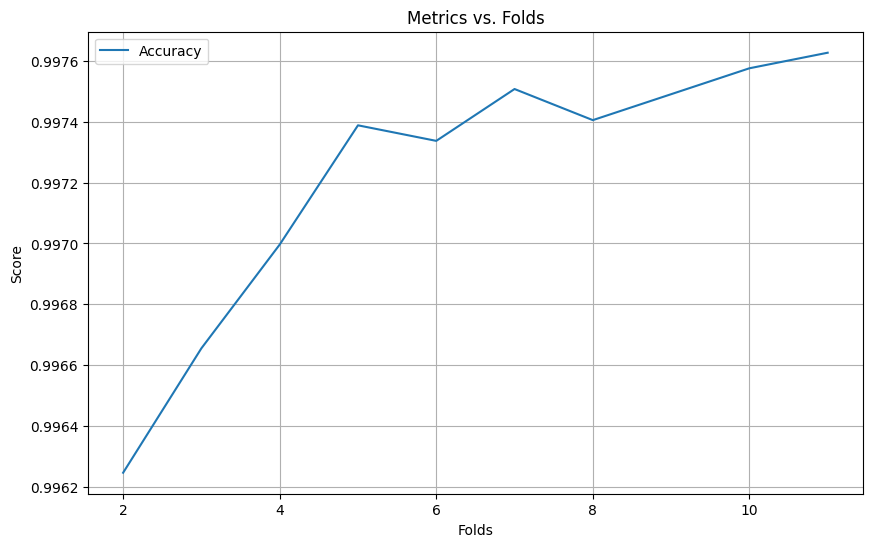

In [25]:
#Plot, sumbu x treshold dan sumbu y nya akurasinya
# Pisahkan hasil menjadi list berdasarkan kolom
num_folds, accuracy, precision, recall, f1_score, training_time = zip(*hasilFold)
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(num_folds, accuracy, label='Accuracy')
#plt.plot(num_folds, precision, label='Precision')
#plt.plot(num_folds, recall, label='Recall')
#plt.plot(num_folds, f1_score, label='F1 Score')
#plt.plot(num_folds, training_time, label='Training Time')

plt.title('Metrics vs. Folds')
plt.xlabel('Folds')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()